<a href="https://colab.research.google.com/github/cwcheng0/practicepython/blob/master/SKLearn_XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# SKLearn XGboost
# source1 video http://www.peixun.net/main.php?mod=course&cid=1281
# 2019-2-21
!pip install xgboost #安装xgboost库
!pip install --upgrade xgboost #更新xgboost库

    100% |████████████████████████████████| 16.6MB 1.5MB/s 
  Found existing installation: xgboost 0.7.post4
    Uninstalling xgboost-0.7.post4:
      Successfully uninstalled xgboost-0.7.post4


In [0]:
##
import xgboost as xgb
##导入需要的库，模块以及数据
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

data = load_boston()
#波士顿数据集非常简单，但它所涉及到的问题却很多

X = data.data
y = data.target

In [0]:
X.shape

(506, 13)

In [0]:
y.shape

(506,)

In [0]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [0]:
##
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)
reg = XGBR(n_estimators=100).fit(Xtrain,Ytrain)

reg.predict(Xtest) #传统接口predict

array([ 8.165384 , 21.919355 , 29.843645 , 11.874415 ,  8.833874 ,
       20.698246 , 15.456877 , 15.544203 , 15.273806 , 13.444421 ,
       22.130966 , 35.072395 , 21.383947 , 27.477697 , 20.449163 ,
       10.434615 , 19.13851  , 24.973454 , 23.284975 , 23.22411  ,
       17.86431  , 17.218367 , 25.284815 , 20.962675 , 20.506361 ,
       16.18782  , 21.71437  , 31.687273 , 22.739857 , 15.976351 ,
       37.61867  , 20.701538 , 21.191647 , 23.53703  , 23.374733 ,
       24.682228 , 16.27922  , 24.404453 , 16.918646 , 34.06889  ,
       18.060398 , 21.352114 , 37.74781  , 17.90909  , 14.035863 ,
       28.243176 , 46.44803  , 14.748789 , 10.719417 , 35.26486  ,
       25.46181  , 21.976503 , 20.583235 , 49.3701   , 26.799538 ,
       26.286161 , 17.937538 , 20.566235 , 16.813719 , 18.816374 ,
       14.940857 , 22.213655 , 19.239632 , 30.246548 , 27.522081 ,
       18.951006 , 19.352182 , 15.716684 , 22.732222 , 19.14629  ,
       29.943521 , 43.593327 , 29.910528 , 22.987352 , 20.6698

In [0]:
##
reg.score(Xtest,Ytest) #你能想出这里应该返回什么模型评估指标么？

0.9197580267581366

In [0]:
y.mean()

22.532806324110677

In [0]:
##
MSE(Ytest,reg.predict(Xtest))

7.466827353555599

In [0]:
##
reg.feature_importances_ #树模型的优势之一：能够查看模型的重要性分数，可以使用嵌入法进行特征选择

array([0.13862929, 0.0046729 , 0.02803738, 0.00623053, 0.08411215,
       0.16510904, 0.08566978, 0.15109034, 0.03271028, 0.0623053 ,
       0.06074766, 0.07632399, 0.10436137], dtype=float32)

In [0]:
##
reg = XGBR(n_estimators=100)
CVS(reg,Xtrain,Ytrain,cv=5)
#这里应该返回什么模型评估指标，还记得么？
#严谨的交叉验证与不严谨的交叉验证之间的讨论：训练集or全数据？

array([0.83340801, 0.77096033, 0.83473392, 0.80424149, 0.76558778])

In [0]:
# average of 5 values
CVS(reg,Xtrain,Ytrain,cv=5).mean()

0.8017863029875325

In [0]:
## 均方誤差
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.041115480238048

In [0]:
#来查看一下sklearn中所有的模型评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [0]:
##
#使用随机森林和线性回归进行一个对比
rfr = RFR(n_estimators=100)
CVS(rfr,Xtrain,Ytrain,cv=5)

array([0.85680394, 0.71969979, 0.79372597, 0.8322425 , 0.79080117])

In [0]:
# Get mean for 5 values
CVS(rfr,Xtrain,Ytrain,cv=5).mean()

0.8054188232321934

In [0]:
##
CVS(rfr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.900655945593567

In [0]:
## 線性回歸
lr = LinearR()
CVS(lr,Xtrain,Ytrain,cv=5).mean()

0.6835070597278082

In [0]:
##
CVS(lr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-25.349507493648453

In [0]:
#如果开启参数slient：在数据巨大，预料到算法运行会非常缓慢的时候可以使用这个参数来监控模型的训练进度
# Use a huge data to run XGBoost
reg = XGBR(n_estimators=10,silent=False)
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()
# default silent is True

[02:33:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[02:33:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[02:33:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[02:33:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[02:33:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[02:33:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[02:33:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[02:33:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[02:33:56] /work

-92.67865836936579

In [0]:
##
def plot_learning_curve(estimator,title, X, y,
                        ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                        ):
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                        ,shuffle=True
                                                        ,cv=cv
                                                        # ,random_state=420
                                                        # We can change it to see the results.
                                                        ,n_jobs=n_jobs)
    if ax == None:
          ax = plt.gca()
    else:
          ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
          ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
          , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
          , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

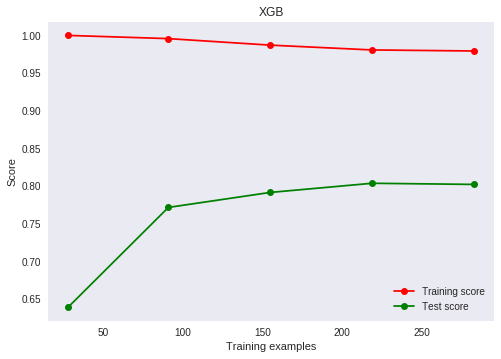

In [0]:
##使用学习曲线观察XGB在波士顿数据集上的潜力
cv = KFold(n_splits=5, shuffle = True, random_state=42)
plot_learning_curve(XGBR(n_estimators=100,random_state=420)
                    ,"XGB",Xtrain,Ytrain,ax=None,cv=cv)
plt.show()

660 0.8046775284172915


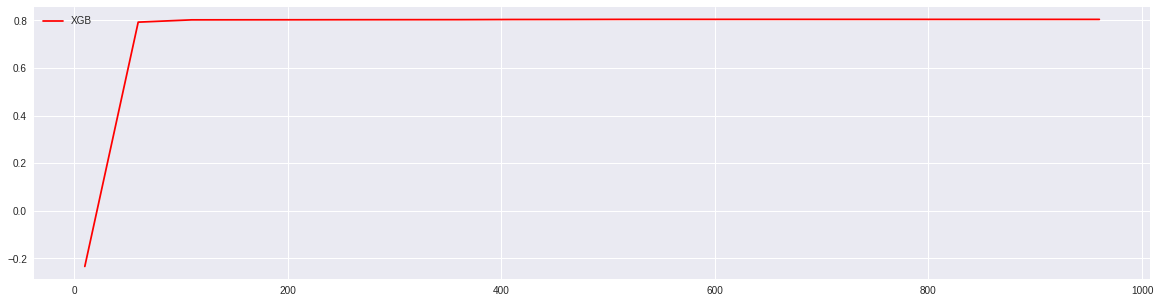

In [0]:
##
#=====【TIME WARNING：25 seconds】=====#
axisx = range(10,1010,50)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()
#选出来的n_estimators非常不寻常，我们是否要选择准确率最高的n_estimators值呢？

650 0.80476050359201 0.01053673846018678
50 0.7857724708830981 0.009072727885598212
150 0.8032842414878519 0.009747694343514357 0.04844478399052411


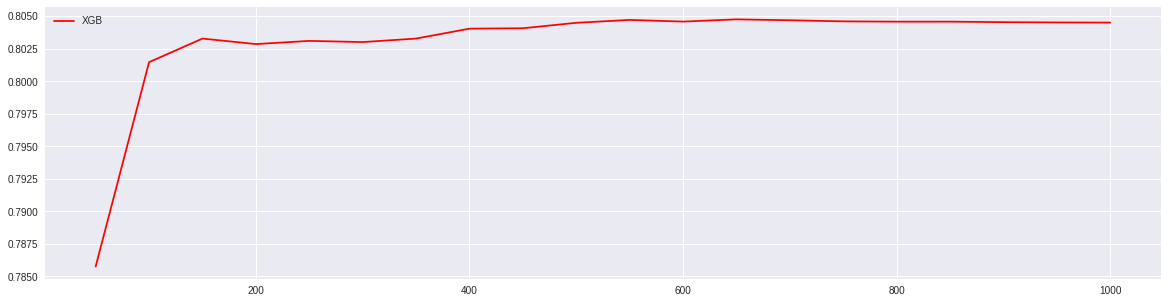

In [0]:
##
#======【TIME WARNING: 20s】=======#
axisx = range(50,1050,50)
rs = []
var = []
ge = []
for i in axisx:
        reg = XGBR(n_estimators=i,random_state=420)
        cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
        #记录1-偏差
        rs.append(cvresult.mean())
        #记录方差
        var.append(cvresult.var())
        #计算泛化误差的可控部分
        ge.append((1 - cvresult.mean())**2+cvresult.var())
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

180 0.8038787848970184 0.00959321570484315
180 0.8038787848970184 0.00959321570484315
180 0.8038787848970184 0.00959321570484315 0.04805674671831314


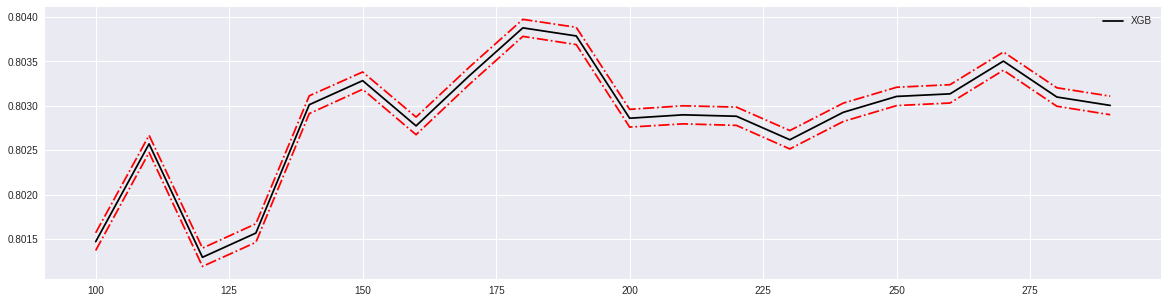

In [0]:
#细化学习曲线，找出最佳n_estimators
axisx = range(100,300,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")

#添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

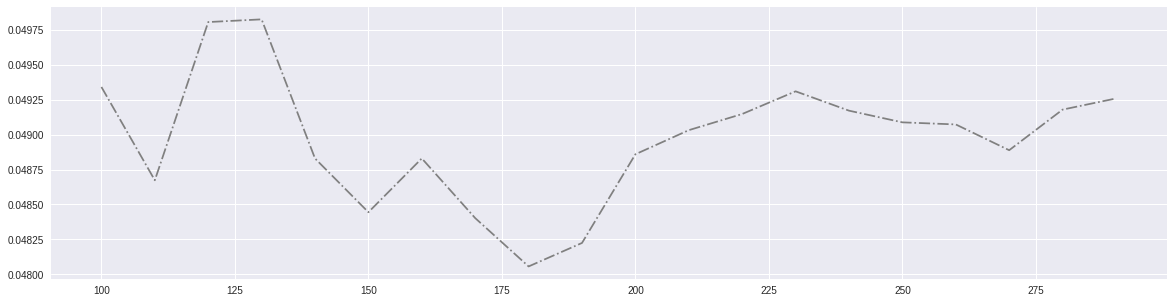

In [0]:
##看看泛化误差的可控部分如何？
plt.figure(figsize=(20,5))
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()

In [0]:
##
#验证模型效果是否提高了？
time0 = time()
print(XGBR(n_estimators=100,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

time0 = time()
print(XGBR(n_estimators=660,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

# This one is the best.
time0 = time()
print(XGBR(n_estimators=180,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9197580267581366
0.04622197151184082
0.9208745746309475
0.24367451667785645
0.9231068620728082
0.06707644462585449


0.7368421052631579 0.837609040251761


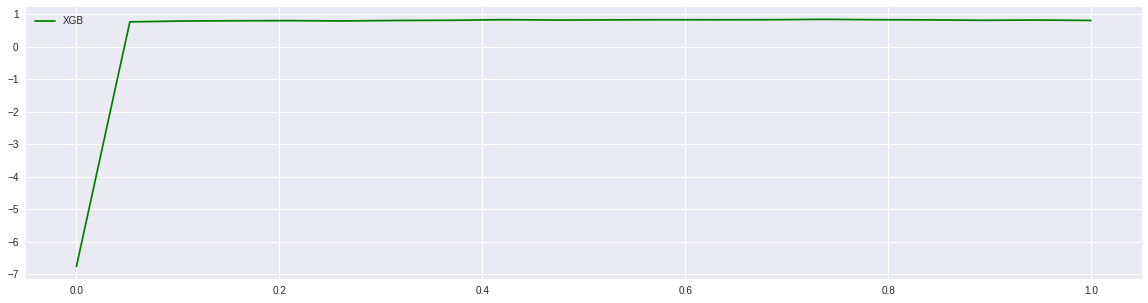

In [0]:
# 20 samples
axisx = np.linspace(0,1,20)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

0.65 0.8302530801197368 0.008708816667924316
0.7999999999999999 0.8277414964661117 0.007159903723250457
0.7999999999999999 0.8277414964661117 0.007159903723250457 0.036832895762985055


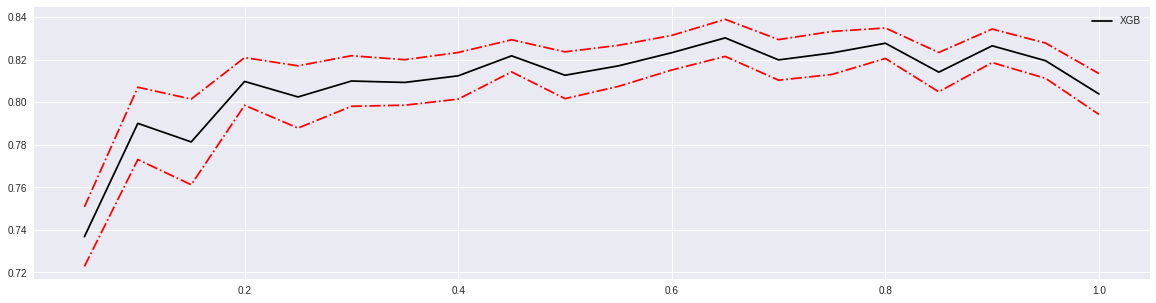

In [0]:
##
#继续细化学习曲线
axisx = np.linspace(0.05,1,20)
rs = []
var = []
ge = []
for i in axisx:
      reg = XGBR(n_estimators=180,subsample=i,random_state=420)
      cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
      rs.append(cvresult.mean())
      var.append(cvresult.var())
      ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))

rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

0.7708333333333334 0.833489187182165 0.005575077682875093
0.7708333333333334 0.833489187182165 0.005575077682875093
0.7708333333333334 0.833489187182165 0.005575077682875093 0.033300928468131166


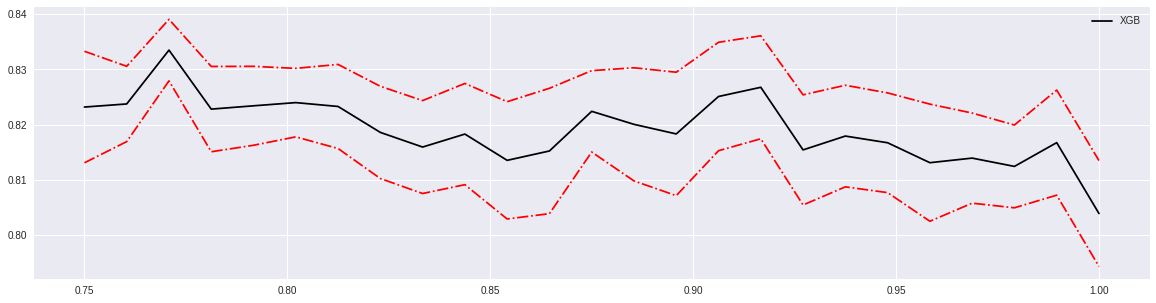

In [0]:
## Deeper
#细化学习曲线
axisx = np.linspace(0.75,1,25)
rs = []
var = []
ge = []
for i in axisx:
      reg = XGBR(n_estimators=180,subsample=i,random_state=420)
      cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
      rs.append(cvresult.mean())
      var.append(cvresult.var())
      ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))

rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [0]:
#看看泛化误差的情况如何
reg = XGBR(n_estimators=180
          ,subsample=0.7708333333333334
          ,random_state=420).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.9159462982185405

In [0]:
MSE(Ytest,reg.predict(Xtest))
#这样的结果说明了什么？
##So it depends on the sample size to decide if to use subsample.

7.821523502888769

In [0]:
##
##
#首先我们先来定义一个评分函数，这个评分函数能够帮助我们直接打印Xtrain上的交叉验证结果
def regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2"],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i]
                    ,CVS(reg
                        ,Xtrain,Ytrain
                        ,cv=cv,scoring=scoring[i]).mean()))
        score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

## Add this part by copying above lines, but to remove sunamples.
reg = XGBR(n_estimators=180
         ## ,subsample=0.7708333333333334
          ,random_state=420).fit(Xtrain,Ytrain)  
  
#运行一下函数来看看效果
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])

r2:0.80
neg_mean_squared_error:-13.48


[0.8038787848970184, -13.482301822063182]

In [0]:
#关闭打印功能试试看？
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)

[0.8038787848970184, -13.482301822063182]

In [0]:
##
#观察一下eta如何影响我们的模型：
from time import time
import datetime

for i in [0,0.2,0.5,1]:
    time0=time()
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    print("learning_rate = {}".format(i))
    regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print("\t")

learning_rate = 0
r2:-6.76
neg_mean_squared_error:-567.55
00:01:125904
	
learning_rate = 0.2
r2:0.81
neg_mean_squared_error:-13.32
00:01:185641
	
learning_rate = 0.5
r2:0.81
neg_mean_squared_error:-13.24
00:01:200932
	
learning_rate = 1
r2:0.72
neg_mean_squared_error:-19.11
00:01:193363
	


0.55 0.8125604372670463


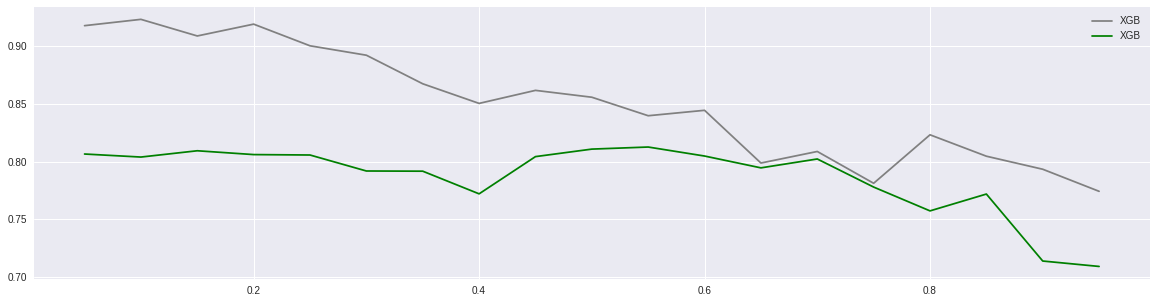

In [0]:
## Draw lines
axisx = np.arange(0.05,1,0.05)
rs = []
te = []
for i in axisx:
        reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
        score = regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)
        test = reg.fit(Xtrain,Ytrain).score(Xtest,Ytest)
        rs.append(score[0])
        te.append(test)
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,te,c="gray",label="XGB")
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()